#**ASSOCIATION - MARKET BASKET ANALYSIS**

This File contains information about Customers buying different grocery items at a Mall.

## 1. Install & import libraries 

In [1]:
# Need to install apyori first
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=85bb72784f0351673f07db8f9d10edd1a8368806b24b236b85c76e95dbdc6c58
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from apyori import apriori
from wordcloud import WordCloud

## 2. Open our dataset

In [3]:
# Import data local
from google.colab import files
uploaded = files.upload()

Saving Dataset_Asosiasi.csv to Dataset_Asosiasi.csv


In [4]:
#open our dataset 
grocery_item = pd.read_csv('Dataset_Asosiasi.csv', header = None)

In [5]:
#see Row dan Column 
grocery_item.shape

(902, 20)

We have 7501 row, 20 column 

In [6]:
#check sample in dataset
grocery_item.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
591,eggs,whole weat flour,eggplant,strawberries,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,cider,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,shrimp,spaghetti,vegetables mix,rice,cookies,hot dogs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,burgers,chocolate,tomatoes,whole wheat pasta,spaghetti,avocado,milk,salmon,vegetables mix,whole wheat rice,gums,ketchup,corn,french fries,cookies,sparkling water,NaN,NaN,NaN,NaN
763,mineral water,meatballs,milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,spaghetti,avocado,brownies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,ground beef,pepper,olive oil,butter,green grapes,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,mineral water,milk,eggs,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,spaghetti,soup,cake,pet food,hot dogs,body spray,strawberries,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Visualisasi data

1. Wordcloud 

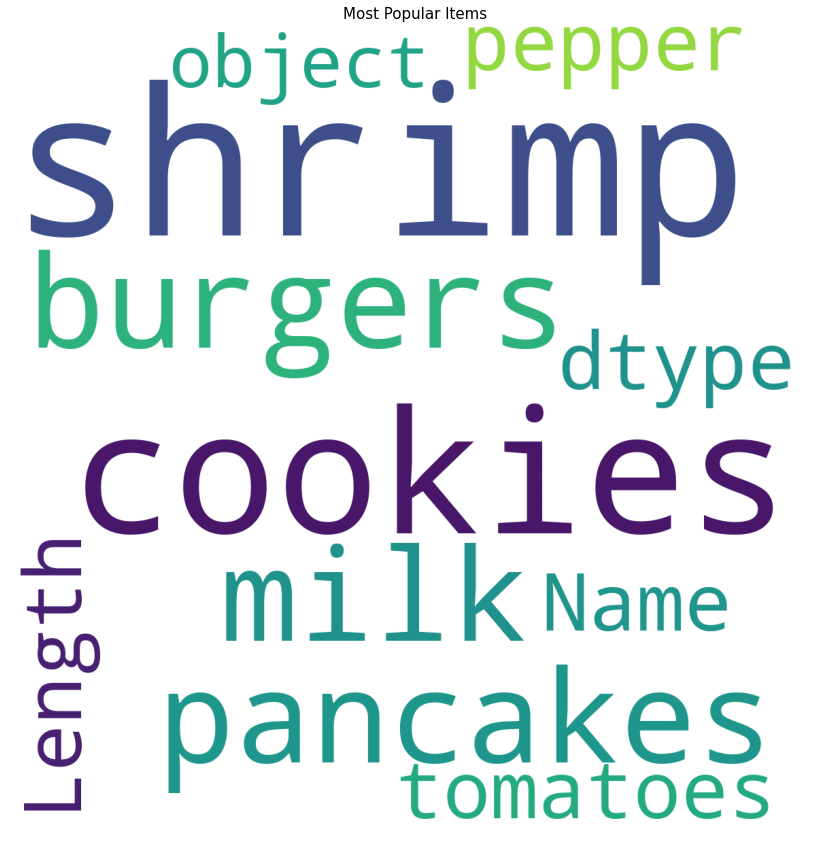

In [7]:
#Hasil Visualisasi Menggunakan wordcloud
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(grocery_item[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 15)
plt.show()

Wordcloud still subjective, check the barchart
2. Barchart

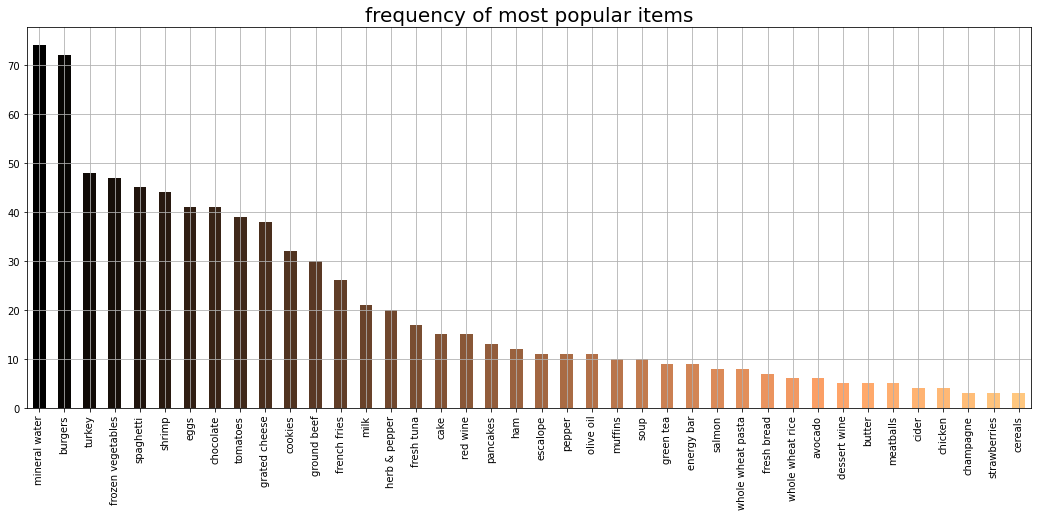

In [8]:
#Visualisasi dn 
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
grocery_item[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

3. Tree Map

In [9]:
#install suarify 
! pip install squarify


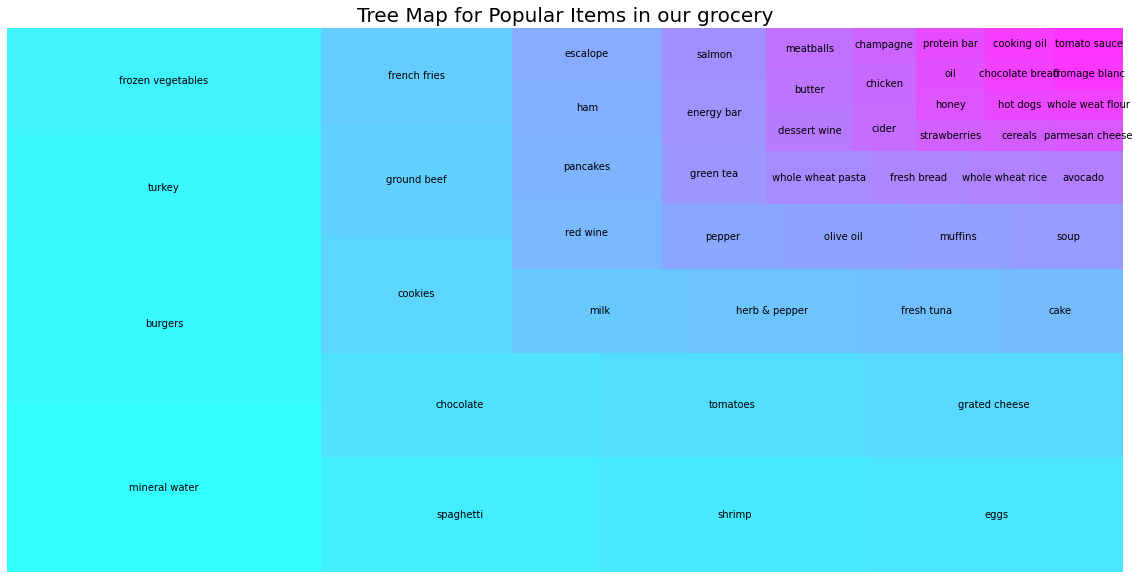

In [10]:
# Visualization using tree map 
import squarify
y = grocery_item[0].value_counts().head(50).to_frame()
y.index
# plotting a tree map
plt.rcParams['figure.figsize'] = (20,10)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot (sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items in our grocery',fontsize = 20)
plt.axis('off')
plt.show()

## Preprocesing data 

In [11]:
# Data preprocessing
transactions = []
for i in range(0, 902):
  transactions.append([str(grocery_item.values[i,j]) for j in range(0, 20)])

In [12]:
# conveting it into an numpy array
transactions = np.array(transactions)

In [13]:
# checking the shape of the array
print(transactions.shape)

(902, 20)


Use Transaction Encoder, the data dimension show 7501 - 121

In [14]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(transactions)
data = pd.DataFrame(data, columns = te.columns_)
# getting the shape of the data
data.shape

(902, 119)

121?  to much column, we need to reduce it to 40 

In [15]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 40

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]
# getting the shape of the data
data.shape

(902, 40)

In [16]:
# let's check the columns

data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

## Algoritma Apriori (Asociation Rules) 

In [17]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least min 0.01 support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.246120,(mineral water)
1,0.092018,(burgers)
2,0.053215,(turkey)
3,0.181818,(chocolate)
4,0.097561,(frozen vegetables)
...,...,...
219,0.012195,"(eggs, milk, chocolate)"
220,0.014412,"(eggs, french fries, spaghetti)"
221,0.012195,"(french fries, milk, spaghetti)"
222,0.015521,"(ground beef, spaghetti, milk)"


set rules rules with  length = 2, dan support more than 0.01

In [18]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
# getting th item sets with length = 2 and support more than 1%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
24,0.060976,"(mineral water, chocolate)",2
25,0.064302,"(mineral water, spaghetti)",2
26,0.056541,"(mineral water, eggs)",2
27,0.057650,"(mineral water, milk)",2


we have three rules, pick the higest rules 0.059 (mineral water & Spaghetti) if you are buying spaghetti, usually you will buy mineral water